<a href="https://colab.research.google.com/github/eliseleahy/Pytorch-Tutorials/blob/main/03_pytorch_computer_vision_exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 03. PyTorch Computer Vision Exercises

The following is a collection of exercises based on computer vision fundamentals in PyTorch.

They're a bunch of fun.

You're going to get to write plenty of code!

## Resources

1. These exercises are based on [notebook 03 of the Learn PyTorch for Deep Learning course](https://www.learnpytorch.io/03_pytorch_computer_vision/).
2. See a live [walkthrough of the solutions (errors and all) on YouTube](https://youtu.be/_PibmqpEyhA).
  * **Note:** Going through these exercises took me just over 3 hours of solid coding, so you should expect around the same.
3. See [other solutions on the course GitHub](https://github.com/mrdbourke/pytorch-deep-learning/tree/main/extras/solutions).

In [201]:
# Check for GPU
!nvidia-smi

Thu Dec 28 15:54:20 2023       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   77C    P0              33W /  70W |    209MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [202]:
# Import torch
import torch

# Exercises require PyTorch > 1.10.0
print(torch.__version__)

# TODO: Setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

2.1.0+cu121


'cuda'

## 1. What are 3 areas in industry where computer vision is currently being used?

1. Medical image segmentation and classification
2. Lane assitst in modern cars
3. phone camera apps to improve images, e.g. google pixels eraser function  

## 2. Search "what is overfitting in machine learning" and write down a sentence about what you find.

Overfitting is when the model is trained too specifically to the training data nd as such is not a good model for the test data and will recieve low accuracry and high loss. In essence the model is not generalisable. It is difficult to determine overfitting, as it requires large datasets.  

## 3. Search "ways to prevent overfitting in machine learning", write down 3 of the things you find and a sentence about each.
> **Note:** there are lots of these, so don't worry too much about all of them, just pick 3 and start with those.

- Feature selection - identifying important features and elimianting the unimportant ones
- Cross-Validation - Generate multiple test train splits and use them to fine tune your model
- Data Augmentation - the process of adding artifially created data to the dataset to increase the amount of data the model is trained on

## 4. Spend 20-minutes reading and clicking through the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/).

* Upload your own example image using the "upload" button on the website and see what happens in each layer of a CNN as your image passes through it.

## 5. Load the [`torchvision.datasets.MNIST()`](https://pytorch.org/vision/stable/generated/torchvision.datasets.MNIST.html#torchvision.datasets.MNIST) train and test datasets.

In [203]:
#Import PyTorch
import torch
from torch import nn

# import torchvision
import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

# import matplot lib
import matplotlib.pyplot as plt

print(torch.__version__)

train_data = datasets.MNIST(
    root = "data",
    train = True,
    download = True,
    transform = ToTensor(),
    target_transform=None
)

test_data = datasets.MNIST(
    root = "data",
    train = False,
    download = True,
    transform = ToTensor(),
    target_transform=None
)

2.1.0+cu121


## 6. Visualize at least 5 different samples of the MNIST training dataset.

60000 10000
image Shape: torch.Size([1, 28, 28])
RandomIndex: 30449 | label: 7
RandomIndex: 48657 | label: 8
RandomIndex: 54340 | label: 1
RandomIndex: 34260 | label: 6
RandomIndex: 12700 | label: 3


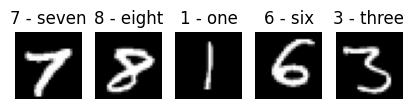

In [204]:
# find out the len of the test and train datasets
print(len(train_data), len(test_data))

# find out the classes in the dataset
class_names = train_data.classes

# visualise the data (5 images)

import matplotlib.pyplot as plt

image, label = train_data[0]
print(f"image Shape: {image.shape}")


fig = plt.figure(figsize=(5,1))
rows, cols = 1, 5

for i in range(1, rows*cols+1):
  random_idx = torch.randint(0, len(train_data), size=[1]).item()
  img, label = train_data[random_idx]
  print(f"RandomIndex: {random_idx} | label: {label}")
  ax = fig.add_subplot(rows, cols, i)
  ax.imshow(img.squeeze(), cmap="gray")
  ax.set_title(class_names[label])
  ax.axis('off')


## 7. Turn the MNIST train and test datasets into dataloaders using `torch.utils.data.DataLoader`, set the `batch_size=32`.

In [205]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(dataset = train_data, batch_size = 32, shuffle = True)
test_dataloader = DataLoader(dataset = test_data, batch_size = 32)

print(f"traing_dataloader len: {len(train_dataloader)} | test_dataloader: {len(test_dataloader)}")

traing_dataloader len: 1875 | test_dataloader: 313


In [206]:
train_feature_batch, train_feature_labels = next(iter(train_dataloader))
len(train_feature_batch), len(train_feature_labels)

(32, 32)

## 8. Recreate `model_2` used in notebook 03 (the same model from the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/), also known as TinyVGG) capable of fitting on the MNIST dataset.

In [207]:
from torch import nn

class MNISTModelV2(nn.Module):
    def __init__(self,
                 input_shape: int,
                 hidden_units: int,
                 output_shape: int):
        super().__init__()
        self.conv_block_1 = nn.Sequential(
            nn.Conv2d(
                in_channels=input_shape,
                out_channels=hidden_units,
                kernel_size=3,
                stride=1,
                padding=1
            ),
            nn.ReLU(),
            nn.Conv2d(
                in_channels=hidden_units,
                out_channels=hidden_units,
                kernel_size=3,
                stride=1,
                padding=1
            ),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )
        self.conv_block_2 = nn.Sequential(
            nn.Conv2d(
                in_channels=hidden_units,
                out_channels=hidden_units,
                kernel_size=3,
                stride=1,
                padding=1
            ),
            nn.ReLU(),
            nn.Conv2d(
                in_channels=hidden_units,
                out_channels=hidden_units,
                kernel_size=3,
                stride=1,
                padding=1
            ),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )
        self.classifier = nn.Sequential(
          nn.Flatten(),
          # Where did this in_features shape come from?
          # It's because each layer of our network compresses and changes the shape of our inputs data.
          nn.Linear(in_features=hidden_units*7*7,
                    out_features=output_shape)
      )

    def forward(self, x: torch.Tensor):
      x=self.conv_block_1(x)
      x=self.conv_block_2(x)
      x=self.classifier(x)
      return x

In [208]:
torch.manual_seed(42)
model_2 = MNISTModelV2(input_shape=1,
    hidden_units=10,
    output_shape=len(class_names)).to(device)
model_2

MNISTModelV2(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

## 9. Train the model you built in exercise 8. for 5 epochs on CPU and GPU and see how long it takes on each.

In [209]:
import requests
from pathlib import Path

# download helper functions from Leanr pytorch repor

if Path("helper_functions.py").is_file():
  print("Help_fcuntions already downloaded")
else:
  print("downloading helper functions")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

Help_fcuntions already downloaded


In [210]:
from helper_functions import accuracy_fn

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_2.parameters(), lr=0.1)

In [211]:
def train_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer,
               accuracy_fn,
               device: torch.device = device):
  train_loss, train_acc = 0, 0
  model.to(device)
  for batch, (X, y) in enumerate(data_loader):
    X, y = X.to(device), y.to(device)

    #1. forward pass
    y_pred = model(X)

    #2. loss
    loss = loss_fn(y_pred, y)
    train_loss += loss
    train_acc += accuracy_fn(y_true = y,
                             y_pred = y_pred.argmax(dim=1))

    #3. optimise aro grad
    optimizer.zero_grad()

    #4. loss backwards
    loss.backward()

    #5. optimizer step
    optimizer.step()

  # callulate loss and accuracy
  train_loss /= len(data_loader)
  train_acc /= len(data_loader)
  print(f"Train loss: {train_loss:.5f} | Train accuracy: {train_acc:.2f}%")

def test_step(model: torch.nn.Module,
              data_loader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              accuracy_fn,
              device: torch.device = device):
  test_loss, test_acc = 0, 0
  model.to(device)
  model.eval()
  with torch.inference_mode():
    for X, y in data_loader:
      X, y = X.to(device), y.to(device)

      #1. forward pass
      test_pred = model(X)

      # 2. loss and accuracy
      test_loss += loss_fn(test_pred, y)
      test_acc += accuracy_fn(y_true=y,
                              y_pred=test_pred.argmax(dim=1))

    # adjust metircs and print
    test_loss /= len(data_loader)
    test_acc /= len(data_loader)
    print(f"Test loss: {test_loss:.5f} | Test accuracy: {test_acc:.2f}%")



In [212]:
from timeit import default_timer as timer

def get_model_train_time(start: float,
                     end: float,
                     device: torch.device = None):

  total_time= end - start
  return total_time

In [213]:
#device = "cuda"

print(device)

from tqdm.auto import tqdm

torch.cuda.manual_seed(42)

train_start_time_on_GPU = timer()

epochs=5
for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n---------")
  train_step(
      model = model_2,
      data_loader = train_dataloader,
      loss_fn = loss_fn,
      optimizer = optimizer,
      accuracy_fn = accuracy_fn,
      device = device
  )
  test_step(data_loader=test_dataloader,
        model=model_2,
        loss_fn=loss_fn,
        accuracy_fn=accuracy_fn
    )

train_end_time_on_GPU = timer()
total_train_time_on_GPU = get_model_train_time(start = train_start_time_on_GPU,
                                              end = train_end_time_on_GPU,
                                              device=device)
total_train_time_on_GPU

cuda


  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 0
---------
Train loss: 0.26893 | Train accuracy: 91.21%
Test loss: 0.07318 | Test accuracy: 97.42%
Epoch: 1
---------
Train loss: 0.06888 | Train accuracy: 97.83%
Test loss: 0.04356 | Test accuracy: 98.54%
Epoch: 2
---------
Train loss: 0.05477 | Train accuracy: 98.30%
Test loss: 0.04265 | Test accuracy: 98.59%
Epoch: 3
---------
Train loss: 0.04590 | Train accuracy: 98.55%
Test loss: 0.03975 | Test accuracy: 98.73%
Epoch: 4
---------
Train loss: 0.04042 | Train accuracy: 98.70%
Test loss: 0.03850 | Test accuracy: 98.73%


63.41761468899858

## 10. Make predictions using your trained model and visualize at least 5 of them comparing the prediciton to the target label.

In [214]:
def make_predictions(model, data, device):
  pred_probs = []
  model.to(device)
  model.eval()
  with torch.inference_mode():
    for sample in data:
      sample = torch.unsqueeze(sample, dim=0).to(device)

      pred_logits = model(sample)

      pred_prob = torch.softmax(pred_logits.squeeze(), dim = 0)

      pred_probs.append(pred_prob)

    return torch.stack(pred_probs)



In [215]:
import random

random.seed(42)

test_samples=[]
test_labels=[]

for sample, label in random.sample(list(test_data), k=10):
  test_samples.append(sample)
  test_labels.append(label)

pred_probs = make_predictions(model_2, test_samples, device)

pred_probs[:2]


tensor([[7.5697e-10, 2.4823e-07, 9.9997e-01, 1.1350e-06, 8.3651e-14, 8.7929e-15,
         4.1394e-12, 2.9527e-08, 3.0209e-05, 1.5230e-10],
        [1.5900e-08, 9.9919e-01, 3.8511e-06, 1.1073e-07, 1.6144e-04, 1.7641e-04,
         1.4546e-04, 1.2407e-06, 2.0454e-04, 1.1451e-04]], device='cuda:0')

Text(0.5, 1.0, '2 - two')

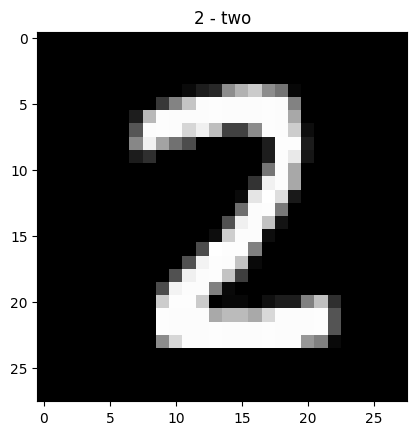

In [216]:
plt.imshow(test_samples[0].squeeze(), cmap="gray")
plt.title(class_names[test_labels[0]])

In [217]:
pred_classes = pred_probs.argmax(dim=1)
pred_classes

tensor([2, 1, 2, 4, 6, 6, 4, 9, 1, 1], device='cuda:0')

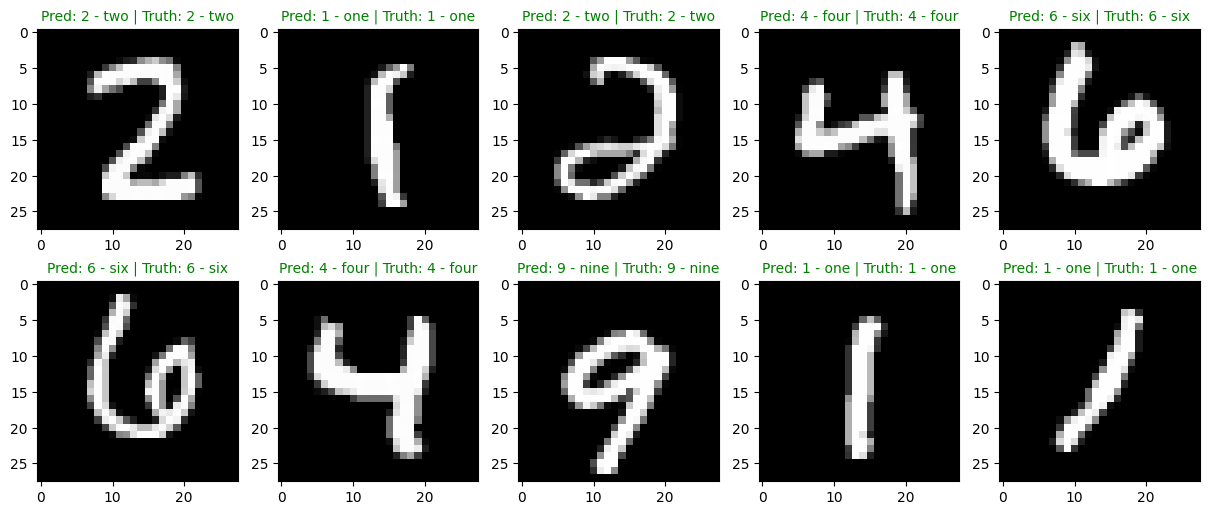

In [218]:
# Plot predictions
plt.figure(figsize=(15, 6))
nrows = 2
ncols = 5

for i, sample in enumerate(test_samples):
  # Create a subplot
  plt.subplot(nrows, ncols, i+1)

  # Plot the target image
  plt.imshow(sample.squeeze(), cmap="gray")

  #plt.axis('off')

  # Find the prediction label (in text form, e.g. "Sandal")
  pred_label = class_names[pred_classes[i]]

  # Get the truth label (in text form, e.g. "T-shirt")
  truth_label = class_names[test_labels[i]]

  # Create the title text of the plot
  title_text = f"Pred: {pred_label} | Truth: {truth_label}"

  # Check for equality and change title colour accordingly
  if pred_label == truth_label:
      plt.title(title_text, fontsize=10, c="g") # green text if correct
  else:
      plt.title(title_text, fontsize=10, c="r") # red text if wrong


## 11. Plot a confusion matrix comparing your model's predictions to the truth labels.

In [219]:
# See if torchmetrics exists, if not, install it
try:
    import torchmetrics, mlxtend
    print(f"mlxtend version: {mlxtend.__version__}")
    assert int(mlxtend.__version__.split(".")[1]) >= 19, "mlxtend verison should be 0.19.0 or higher"
except:
    !pip install -q torchmetrics -U mlxtend # <- Note: If you're using Google Colab, this may require restarting the runtime
    import torchmetrics, mlxtend
    print(f"mlxtend version: {mlxtend.__version__}")

mlxtend version: 0.23.0


In [228]:
y_preds = []

model_2.to(device)
model_2.eval()
with torch.inference_mode():
  for X, y in tqdm(test_dataloader):
    X, y = X.to(device), y.to(device)

    y_logit = model_2(X)

    y_pred = torch.softmax(y_logit, dim=1).argmax(dim=1)

    y_preds.append(y_pred.cpu())

y_preds_tensor = torch.cat(y_preds)
y_preds_tensor[:10]
y_preds_tensor.to(device)
device

  0%|          | 0/313 [00:00<?, ?it/s]

'cuda'

tensor([[ 978,    0,    0,    0,    0,    0,    0,    1,    1,    0],
        [   1, 1124,    2,    4,    2,    1,    0,    1,    0,    0],
        [   3,    0, 1017,    4,    4,    0,    0,    2,    2,    0],
        [   0,    0,    1, 1004,    0,    3,    0,    0,    2,    0],
        [   1,    0,    0,    0,  977,    0,    0,    1,    1,    2],
        [   1,    0,    0,    9,    0,  879,    1,    1,    1,    0],
        [   5,    2,    0,    1,    3,    3,  944,    0,    0,    0],
        [   0,    2,    6,    3,    1,    0,    0, 1013,    1,    2],
        [   7,    0,    1,    2,    0,    1,    0,    1,  960,    2],
        [   2,    3,    0,    2,    8,    6,    0,    7,    4,  977]])

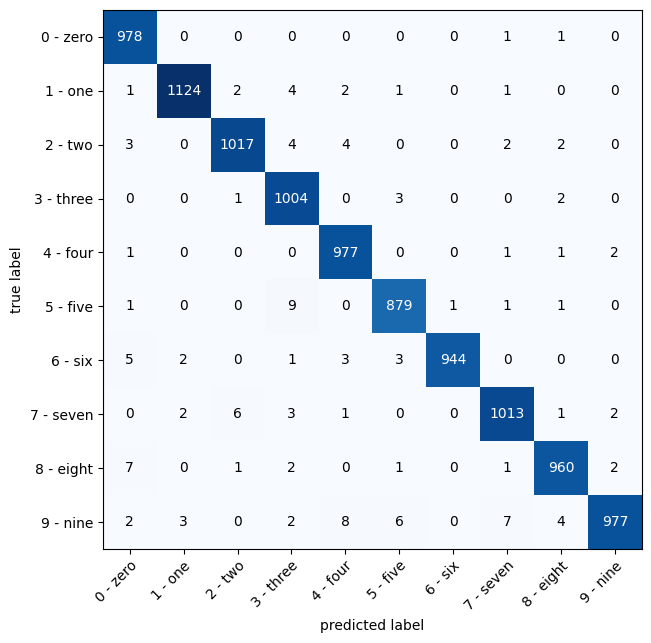

In [229]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

confmat = ConfusionMatrix(num_classes=len(class_names), task='multiclass')
confmat_tensor = confmat(preds=y_preds_tensor,
                         target=test_data.targets)

fig, ax = plot_confusion_matrix(
    conf_mat = confmat_tensor.numpy(),
    class_names = class_names,
    figsize=(10,7)
)

confmat_tensor



## 12. Create a random tensor of shape `[1, 3, 64, 64]` and pass it through a `nn.Conv2d()` layer with various hyperparameter settings (these can be any settings you choose), what do you notice if the `kernel_size` parameter goes up and down?

## 13. Use a model similar to the trained `model_2` from notebook 03 to make predictions on the test [`torchvision.datasets.FashionMNIST`](https://pytorch.org/vision/main/generated/torchvision.datasets.FashionMNIST.html) dataset.
* Then plot some predictions where the model was wrong alongside what the label of the image should've been.
* After visualing these predictions do you think it's more of a modelling error or a data error?
* As in, could the model do better or are the labels of the data too close to each other (e.g. a "Shirt" label is too close to "T-shirt/top")?